# Linear Algebra & Statistics 1
# Gabriel Becton

Today we will be using the numpy module to do do some basic statistics on vectors

In [ ]:
# import the usual suspects

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Statistics

Statistics allow us to summarize data in informative ways.

We will apply our statistics measures to the heights of presidents.  There is a table of the U.S. presidents and their heights at [this website](https://www.potus.com/presidential-facts/presidential-heights/)

We will use pandas to retrieve and read the table.

In [ ]:
import pandas as pd

tables = pd.read_html("https://www.potus.com/presidential-facts/presidential-heights/")

How many tables did we get?

In [ ]:
len(tables)

In [ ]:
prezzyheights = tables[0]
prezzyheights.head()

Let's sort our DataFrame by # so the presidents are listed in historical order.

In [ ]:
prezzyheights.sort_values("#", inplace=True) #inplace=True changes the DataFrame permanently
prezzyheights.head()

,Rank,#,President,Height (in),Height (cm)
4,5,1,George Washington,6 ft 2 in,188 cm
14,14,10,John Tyler,6 ft 0 in,183 cm
36,36,11,James K. Polk,5 ft 8 in,173 cm
37,36,12,Zachary Taylor,5 ft 8 in,173 cm
32,33,13,Millard Fillmore,5 ft 9 in,175 cm


Hmm. Something went wrong there.  It looks like the values that we are sorting are strings instead of numbers so 1 is followed by 10 instead of 2.  We will have to do more work

In [ ]:
prezzyheights["#"] = pd.to_numeric(prezzyheights["#"])
prezzyheights.sort_values("#", inplace=True)
prezzyheights.head()

UGH!  Grover Clevelend was the 22nd **and** the 24th president!  We don't want to double-count him anyway.  Let's just call him the 22nd president.

In [ ]:
prezzyheights.loc[prezzyheights["President"] == "Grover Cleveland","#"] = '22'
prezzyheights["#"] = pd.to_numeric(prezzyheights["#"])
prezzyheights.sort_values("#", inplace=True)
prezzyheights.reset_index(drop=True)
prezzyheights.head()

We will also need to change that height data to get rid of the cm and convert to numeric.

In [ ]:
prezzyheights["Height (cm)"] = pd.to_numeric(prezzyheights["Height (cm)"].str.extract('(\d+)', expand=False))
prezzyheights.head()

,Rank,#,President,Height (in),Height (cm)
4,5,1,George Washington,6 ft 2 in,188
40,41,2,John Adams,5 ft 7 in,170
3,4,3,Thomas Jefferson,6 ft 2.5 in,189
44,45,4,James Madison,5 ft 4 in,163
13,14,5,James Monroe,6 ft 0 in,183


Let's make some plots of our data

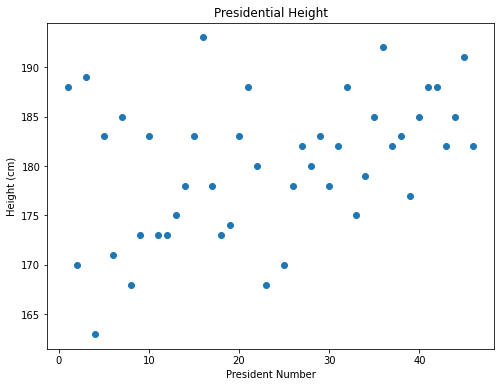

In [ ]:
# Make a scatter plot of height vs number

fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(prezzyheights["#"], prezzyheights["Height (cm)"])
#ax.set_xlim([-1, 30])
ax.set_title('Presidential Height')
ax.set_xlabel('President Number')
ax.set_ylabel('Height (cm)');

And a histogram.

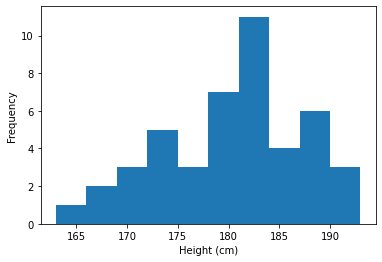

In [ ]:
ax = prezzyheights["Height (cm)"].plot.hist(bins=10)
ax.set_xlabel('Height (cm)');

### Now for some statistics!

In [ ]:
# Number of presidents 
print('Number of presidents')
print(prezzyheights.shape[0])
print(len(prezzyheights["Height (cm)"]))

Number of presidents
45
45


In [ ]:
# Max
maxheight = prezzyheights["Height (cm)"].max()
print('Max height = {} cm'.format(maxheight))

# The following generates a list of presidents with the max height
# There happens to be only one with that height so we can take the first element.
tallest = prezzyheights.loc[prezzyheights["Height (cm)"] == maxheight, "President"]

maxheightname = tallest.iloc[0]
print('Tallest = {}'.format(maxheightname))

Max height = 193 cm
Tallest = Abraham Lincoln


In [ ]:
# Output the minimum presidential height allong with the corresponding name

minheight = prezzyheights["Height (cm)"].min()
print('Min height = {} cm'.format(minheight))

shortest = prezzyheights.loc[prezzyheights["Height (cm)"] == minheight, "President"]

minheightname = shortest.iloc[0]
print('Shortest = {}'.format(minheightname))

Min height = 163 cm
Shortest = James Madison


### Averages

There are 3 commonly used averages in statistics, the **mean**, **median** and **mode**.

* The **mean** is the most frequently used and is equal to the sum of a vector of data divided by the number of elements.  The mean takes all data into account equally.
* The **median** is calculated by sorting the values and then picking the center one (if the number of elements is odd) or taking the mean of the two middle ones (if the number of elements is even).  The median is useful if there are outliers that could throw off your average.
* The **mode** is the most frequently occuring value in your vector.  It isn't used very often.

In [ ]:
meanheight = prezzyheights["Height (cm)"].mean()
medianheight = prezzyheights["Height (cm)"].median()
modeheight = prezzyheights["Height (cm)"].mode().iloc[0]   

print('mean height = {:.1f} cm'.format(meanheight))
print('median height = {:.1f} cm'.format(medianheight))
print('mode height = {} cm'.format(modeheight))

mean height = 180.2 cm
median height = 182.0 cm
mode height = 183 cm


### Data Spread (Dispersion)

How spread out is our data? What is the average distance of the data points from the mean?
Are all of the presidents pretty much the same height or is there some *variance*?

The simplest measure of data spread is the **range** of values.

In [ ]:
# Output the ranage i.e. number of cm between tallest and shortest president
range = maxheight - minheight
print('Range height = {:.1f} cm'.format(range))

The usefulness of the range in describing the spread of our data is somewhat limited.  It could be primarily due to one really tall person and/or one really short person.

If we want something more like an average distance from the mean, we should look at the **variance**.  If we have a vector of values like $X = [x_1, x_2, x_3, \ldots]$ then, using summation notation, the mean is calculated via

$$ \bar{X} = \frac{\sum_i{x_i}}{N} $$

where $\bar{X}$ is the mean of $X$ and $N$ is the length of the $X$ vector.

Now for the variance, we first want to take the difference between each $X$ value and the mean.  However, some of those $X$ values are bigger than the mean and some are smaller.  This means that some of the differences will be positive and others negative.  To get around this we square each difference so that they are all positive.  Then we sum the squared differences and divide by $N-1$. 

$$ \mathrm{var}(X) = \frac{\sum_i{(x_i - \bar{X})^2}}{(N-1)} $$

Why $N-1$?  Well, we used up one of our independent measurements in the calculation of the mean.  We could delete that number from our vector and easily recalculate it from our knowledge of the other elements and the mean.

In [ ]:
varheight = prezzyheights["Height (cm)"].var()
print('Height variance = {:.2f} cm^2'.format(varheight))

Height variance = 49.41 cm^2


The variance will be big if the data spread is big and small if the spread is small.  Since we were summing squares, though, the number is hard to compare with our data values.  Look at the units!  $\mathrm{cm}^2$?

This is why, even more common than the variance, the standard deviation is used.  The standard deviation is the square root of the variance.  It has the same units as the measurement and gives us a good notion of the average spread of our data.

In [ ]:
stdheight = prezzyheights["Height (cm)"].std()
print('Height standard deviation = {:.2f} cm'.format(stdheight))

Height standard deviation = 7.03 cm


Thus we can say that most presidents are within about seven cm of the mean height.

Numpy also has many of these basic statistics calculating functions.

In [ ]:
X = np.array([1.2, 3.5, 9.3, 3.5, 5.5, 6.1, 0.8])

print('Median = {:.2f}'.format(np.median(X)))

Median = 3.50


In [ ]:
## Use a numpy function to calculate the mean of the vector X, 
## use other numpy functions to calculate the max and min values.
print('Mean = {:.2f}'.format(np.mean(X)))
print('Min = {:.2f}'.format(np.min(X)))
print('Max = {:.2f}'.format(np.max(X)))

Mean = 4.27
Min = 0.80
Max = 9.30


Numpy doesn't have a mode function, but `scipy.stats` does

In [ ]:
import scipy.stats as sts
print(sts.mode(X)[0])

In [ ]:
# Use scipy to find the mode of the array Y.  DO you agree ith the answer? (Y/N)  ______
Y = np.array([5.5, 1.2, 3.5, 9.3, 3.5, 5.5, 6.1, 0.8])
print(sts.mode(Y)[0])

No, I do not agree with the answer. There are 2 modes in Y. 3.5 and 5.5 are in the function Y two times. therfore they are both considered the mode. Yet, the scipy function only returns the 3.5

The `var` and `std` functions work a little different in `numpy` than they do in Pandas.  In Pandas, the default is to divide by $N-1$ when calculating the variance.  Not so with the `numpy` functions, so you will need to specify.

In [ ]:
varX = np.var(X, ddof=1) # ddof is the number subtracted from N 
stdX = np.std(X, ddof=1)

print('Variance = {:.2f}'.format(varX))
print('Standard Deviation = {:.2f}'.format(stdX))

Variance = 8.80
Standard Deviation = 2.97
